## Load modules and specify paths

In [2]:
# Import required modules
import pandas as pd
import glob2
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Specify paths to files
master_path = r'C:\Users\MT1070\Desktop\Master Call Volume' 
additional_files_path = r'C:\Users\MT1070\Desktop\Master Call Volume\speech-report-extracts'

# Display names of files in master folder
master_file_names = glob2.glob(master_path + "/*.xlsx")

# Display names of files in additional files folder
additional_file_names = glob2.glob(additional_files_path + "/*.xlsx")

# Remove the master Excel file from additional_file_names list if present
additional_file_names = [file for file in additional_file_names if file != r'C:\Users\MT1070\Desktop\Master Call Volume\speech-report-extracts']

# Initialize an empty data frame to store data from all files
final_sheet = pd.DataFrame()

## Read data extracts and append to DF

In [3]:
# Iteratively read data extracts from master files and append them to the final DataFrame
data_frames = []  # Store DataFrames from master files
for file in master_file_names:
    try:
        df = pd.read_excel(file, sheet_name=None, skipfooter=2, engine='openpyxl')
        df_concat = pd.concat(df.values(), ignore_index=True, sort=False)
        data_frames.append(df_concat)
    except Exception as e:
        print(f"Error occurred while processing file: {file}")
        print(str(e))

c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook con

Error occurred while processing file: C:\Users\MT1070\Desktop\Master Call Volume\~$BWH_CW_Operators_Call_Volume_Report_5.23.2023.xlsx
File is not a zip file


## Merge all DataFrames vertically and reset index

In [4]:
if len(data_frames) > 0:
    final_sheet = pd.concat(data_frames, axis=0, ignore_index=True)

# Reset index to use data col in final_sheet
final_sheet.reset_index(drop=True, inplace=True)

In [5]:
# Read df_additional data
df_additional = pd.DataFrame()
for file in additional_file_names:
    try:
        df_additional_temp = pd.read_excel(file, sheet_name=None, skipfooter=2, engine='openpyxl')
        df_additional_temp_concat = pd.concat(df_additional_temp.values(), ignore_index=True, sort=False)
        df_additional = pd.concat([df_additional, df_additional_temp_concat], axis=0, ignore_index=True)
    except Exception as e:
        print(f"Error occurred while processing additional file: {file}")
        print(str(e))



c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook con

## Merge data horizontally and set column headers

In [6]:
if not df_additional.empty:
    final_sheet = pd.concat([final_sheet, df_additional], axis=1)

# Set the column headers
final_sheet.columns = final_sheet.iloc[0]
final_sheet = final_sheet[1:]

# print(final_sheet.columns)


### Combine data into a new Excel file

In [23]:
master_file_path = r"C:\Users\MT1070\Desktop\Master Call Volume\Raw SpinSci Call Volume Evaluation.xlsx"
final_sheet.to_excel(master_file_path, sheet_name='Raw Data', header=True, index=False)

# Read file and skip the first row
df = pd.read_excel(master_file_path, header=0) #, skiprows=[0])

## Merge Date Data

#### Remove repetitive rows with 'date'

In [20]:
data = df[~df['date'].str.contains('date', case=False, na=False)]
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce', exact=False, infer_datetime_format=True)
# data['date'] = data['date'].dt.replace(year=2023)


C:\Users\MT1070\AppData\Local\Temp\ipykernel_23388\3011307080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce', exact=False, infer_datetime_format=True)


### Group column values by 'date'

In [21]:
filtered_data = data.groupby('date').sum()
filtered_data = filtered_data.reset_index()
filtered_data['weekday'] = filtered_data['date'].dt.dayofweek

### Output Data Set to New Sheet 

In [ ]:
filtered_file_path = r"C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx"
final_sheet.to_excel(master_file_path, sheet_name='Raw Data', header=True, index=False)

In [17]:
filtered_file_path = r"C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx"
# writer = pd.ExcelWriter(filtered_file_path, engine='openpyxl')
filtered_data.to_excel(filtered_file_path, sheet_name='Grouped Data', header=True, index=False)

## Plot Internal and External Call Volume

KeyError: 'additional_column'

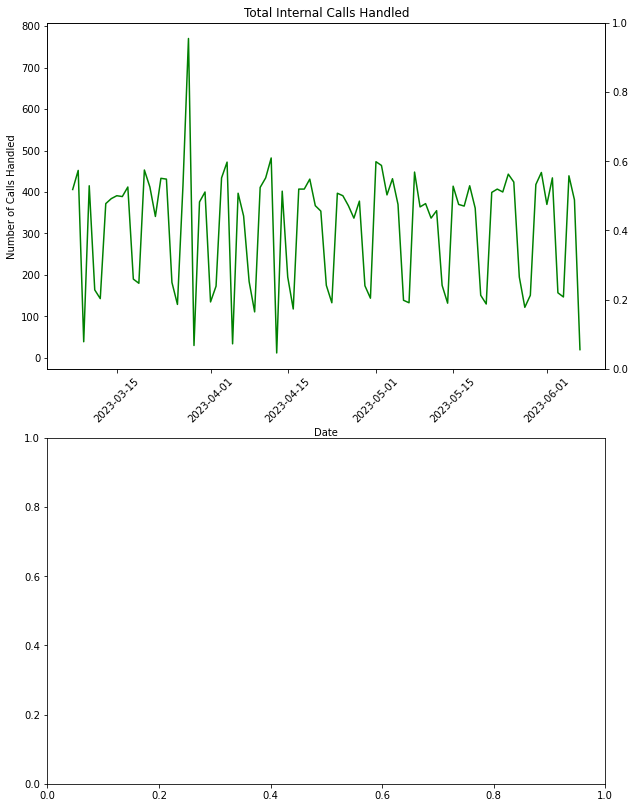

In [22]:
# Plotting internal and external call volumes
# Creating subplots
nrows = 2

if nrows == 2:
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(10, 14))

    # Plotting the first subplot
    ax1 = axes[0]
    ax1.plot(filtered_data['date'], filtered_data['total_internal_calls'], 'g')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Calls Handled')
    ax1.set_title('Total Internal Calls Handled')

    # Adjusting the x-axis tick labels
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

    # Creating a twin y-axis for the additional column
    ax2 = ax1.twinx()
    ax2.plot(filtered_data['date'], filtered_data['additional_column'], 'r')
    ax2.set_ylabel('Additional Column')
    ax2.tick_params(axis='y', labelcolor='r')


    # Plotting the second subplot
    axes[1].plot(filtered_data['date'], filtered_data['total_external_calls'], 'b')  # Replace 'column_name2' with the actual second column you want to plot
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Number of Calls Handled')
    axes[1].set_title('Total External Calls Handled')

    # Formatting the x-axis ticks as "mm/dd/yy" format
    # axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

    # Adjusting the x-axis tick labels
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

    # Adjusting the spacing between subplots
    plt.tight_layout(pad=1.5)

    # Displaying the plots
    plt.show()

elif nrows == 3:
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(10, 14))

    # Plotting the first subplot
    axes[0].plot(filtered_data['date'], filtered_data['total_internal_calls'], 'g')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Number of Calls Handled')
    axes[0].set_title('Total Internal Calls Handled')

    # Formatting the x-axis ticks as "mm/dd/yy" format
    # axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

    # Adjusting the x-axis tick labels
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

    # Plotting the second subplot
    axes[1].plot(filtered_data['date'], filtered_data['total_external_calls'], 'b')  # Replace 'column_name2' with the actual second column you want to plot
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Number of Calls Handled')
    axes[1].set_title('Total External Calls Handled')

    # Formatting the x-axis ticks as "mm/dd/yy" format
    # axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

    # Adjusting the x-axis tick labels
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

    # Plotting the third subplot
    axes[2].plot(filtered_data['date'], filtered_data['total_calls_transfered'], 'k')  # Replace 'column_name2' with the actual second column you want to plot
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Number of Calls Handled')
    axes[2].set_title('Total Calls Transferred')

    # Formatting the x-axis ticks as "mm/dd/yy" format
    # axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

    # Adjusting the x-axis tick labels
    plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45)


    # Adjusting the spacing between subplots
    plt.tight_layout(pad=1.5)

    # Displaying the plots
    plt.show()

#### Reformat date column and remove rows with 'date' in the date column

In [ ]:
final_sheet['date'] = pd.to_datetime(final_sheet['date'], format='%m/%d/%Y', errors='coerce')
final_sheet = final_sheet[~final_sheet['date'].astype(str).str.contains('date', case=False, na=False)]

# Group the data set based on calendar date
filtered_data = final_sheet.groupby(pd.Grouper(key='date', freq='D')).sum()

## Combine data into a new Excel file

In [ ]:
master_file_path = r"C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx"
final_sheet.to_excel(master_file_path, sheet_name='Raw Data', header=True, index=False)


### Graveyard

In [ ]:
# Group the data set based on calendar date
# filtered_data = final_sheet.groupby(final_sheet['date'].dt.date).sum()


# # Drop rows where 'date' column contains the string 'date'
# final_sheet = final_sheet[~final_sheet['date'].str.contains('date', case=False, na=False)]